# TFG
## Machine Learning-Based Predictive Modeling of Energy Prices
### Rodrigo De Lama Fernández
### Emilio Parrado Hernández

# Index
1.

In [2]:
# # Always run first
# import os
# import logging

# # Set the environment variable to enable debugging
# os.environ['TFG_DEBUG'] = '1'
# del os.environ['TFG_DEBUG'] # Delete it for the time being

# # if os.getenv('TFG_DEBUG', '1'):
# if os.getenv('TFG_DEBUG') == '1':
#     logging.basicConfig(level=logging.DEBUG)
#     logger = logging.getLogger(__name__)
#     logger.debug("Debugging is enabled. [Main IPYNB]")

# logging.basicConfig(level=logging.WARNING)

# # Remove the environment variable after use
# # del os.environ['TFG_DEBUG']

# Always run first - Proper logging setup
import os
import logging

# Clear any existing handlers to avoid duplicate logs
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Set up logging based on environment variable
if os.getenv('TFG_DEBUG') == '1':
    logging.basicConfig(
        level=logging.DEBUG,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
    )
else:
    logging.basicConfig(
        level=logging.WARNING,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
    )

# Get logger for this module
logger = logging.getLogger(__name__)

# Test logging
logger.debug("Debugging is enabled")
logger.warning("This warning should always appear")

2025-05-08 09:16:50,611 - __main__ - WARNING - This warning should always appear


In [3]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Cross-validation
from sklearn.model_selection import cross_val_score

# Package import Cache clear
import sys

import utils.sliding_window
sys.path.append('/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/code')

import importlib
import utils.basic_plots
importlib.reload(utils.basic_plots)
importlib.reload(utils.sliding_window)
from utils.logger import get_logger
logger = get_logger(__name__)

# Utilities
# Do proper imports not this
# from utils.sliding_window import *
from utils.sliding_window import create_weight_matrix, create_weight_matrix_with_features
# from utils.basic_plots import *
from utils.basic_plots import plot_actual_vs_predicted, plot_error, plot_feature_importance
from utils.mini_models import mini_model

importlib.reload(utils.mini_models)

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Testing split
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

testing the matrix build

In [8]:
# read data
csv_hour_file = '../data/hour_14_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df = df[['Datetime', 'MarginalES']]

# Date range for the training matrix
# train_start_date = '2018-01-01'
train_start_date = '2018-12-25'
train_end_date = '2022-01-01'

train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]



##### 

# probar con eso tambien
# error de retorno con 0s
#! sumarle 0,001 a todo para que nunca sea 0
#! limpiar numeros negativos
    # subsanado con limpieza y posterior interpolacion

# benchmark 1 precios absolutos - precios CHECK
# benchmark 2 precios relativos - retornos CHECK
# benchmark 3 indicadores tecnicos
    # 1. media movil
    # 2. momentum
    # 3. RSI
    # 4. añdir los precios absolutos o relativos
# benchmark 4 random forest - probably not good because it doesn't detect peaks - hace medias, entonces nunca sale el valor mas bajo



# precios reales y precios relativos

# Sliding window size
window_size = 3

In [9]:
# Create sliding window matrix - method from utils.sliding_window
X_train, y_train = create_weight_matrix(train_subset_df, window_size)

Print to check the matrix

In [10]:
# print the shape of the matrix
print(X_train.shape, y_train.shape)

# print the actual matrix
print(X_train.head())
print(y_train.head())

# Lasso
# .coef_ da los pesos del modelo lineal
# las que sean cero o muy bajitas no van a tener peso en la decision

(1099, 3) (1099,)
       0      1      2
0  66.58  67.20  68.12
1  67.20  68.12  64.64
2  68.12  64.64  57.39
3  64.64  57.39  63.91
4  57.39  63.91  65.22
0    64.64
1    57.39
2    63.91
3    65.22
4    65.88
dtype: float64


## Build a simple regression model and train with the matrix

In [11]:
# Build a simple regression model and train with the matrix
model_lr = LinearRegression()

# Train with the training subset
model_lr.fit(X_train, y_train)

#! en vez de score llamar a predict y guardar los valors

#! bucle for
# predict


# Fit with the next subset up to the row before prediction

# Date range for the testing (fit) matrix
test_start_date = '2022-01-02'
# test_end_date = '2025-01-01'
test_end_date = '2025-03-17'

test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# Create sliding window matrix
X_test, y_test = create_weight_matrix(test_subset_df, window_size)

#! ERROR - you cannot fit the regression again with test data - its retraining the whole thing
#! Fit the model w test data
# model_lr.fit(X_test, y_test)

# llamar a fit con toda la matriz, con la anchura ventana deslizante
# y altura num of days back

#! me falta score con test
# llama a predict con la x y compara con mis ys
# guardar errores y predicciones
# std dev
# percentil

#! pickle para guardar sets de numeros en vez de numpy ??

# Predict the target values
# y_pred = model_lr.predict(X) # SOLO la lonchita
# predict o score para otros modelos
####### sólo predict con la ultima fila
# y_pred = model_lr.predict(X_test) #! SOLO la lonchita ???
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# mirar tambien Expectation Short-Fall
# mirar cual seria la peor prediccion
# la media del 5% peor de resultados
# buscar que el caso peor no sea tan malo?

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

###### Predict con la ultima fila
# llamar a predict con solo la ultima fila (ancho)
X_last = X_test.iloc[-1, :].values.reshape(1, -1)
y_pred = model_lr.predict(X_last)
# mse = mean_squared_error(y_test, y_pred)
print(f"x_last: {X_last}")
print(f"y_pred: {y_pred}")

# Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

x_last: [[70.01 95.12 18.82]]
y_pred: [36.46482644]


## Now with the return values

Pasos a seguir

Calcular el retorno (en vez de usar los precios)
Interpolar (rellenar valores)
Coger el set completo y partir en dos

Entrenar con la primera mitad (bloque 1 de datos)
    - Train

Coger todo el set de datos anterior a la fila que queremos (bloque 2 de datos)
    - Fit

Hacer predict de la siguiente fila al set de datos anterior (resultado a predecir)


In [12]:
# window_size = 30

# # read return data
# csv_hour_file = '../data/clean_return_data.csv'
# df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
# df = df[['Datetime', 'Return']]

# # Date range for the training matrix
# # train_start_date = '2018-01-01'
# train_start_date = '2018-12-25'
# train_end_date = '2022-01-01'

# train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# # Create sliding window matrix
# X_train, y_train = create_sliding_window(train_subset_df, window_size)

# # Build a simple regression model and train with the matrix
# model_lr = LinearRegression()

# # Train with the training subset
# # model_lr.train(X_train, y_train)
# model_lr.fit(X_train, y_train)


# # Fit with the next subset up to the row before prediction

# # Date range for the testing (fit) matrix
# test_start_date = '2022-01-02'
# # test_end_date = '2025-01-01'
# test_end_date = '2025-03-17'

# test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# # Create sliding window matrix
# X_test, y_test = create_sliding_window(test_subset_df, window_size)

# #! no usar sólo la lonchita - usar toda la matriz de la que considere que tengo memoria
# #! programar distintas ventanas fijas de memoria
# #! mirar el error que dan las distintas memorias y comparar
# y_pred = model_lr.predict(X_test) # SOLO la lonchita ??? NO error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# # linear regressor has mean error 0 that why we do error cuadratico o absoluto

# # llamar a predict con solo la ultima fila (ancho)
# X_last = X_test.iloc[-1, :].values.reshape(1, -1)
# y_pred = model_lr.predict(X_last)
# # mse = mean_squared_error(y_test, y_pred)
# print(f"x_last: {X_last}")
# print(f"y_pred: {y_pred}")

In [13]:
# For later on...
#! Build a simple random forest model and train with the matrix

# model_rf = sklearn RandomForest()
# model_rf.fit(X, y)

# # llamar a fit con toda la matriz, con la anchura ventana deslizante
# # y altura num of days back

# # Predict the target values
# y_pred = model_rf.predict(X)

# # llamar a predict con solo una fila (ancho)

# # Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

## Añadiendo columnas
Calcularemos varias metricas con la libreria "ta" - technical analysis

### Próximos pasos
- Añadir columnas de métricas de precios
  - Media móvil corta (a pocos días)
  - Media móvil larga (a muchos días)
  - RSI
  - Volatilidad
  - Momentum
- Probar regresión otra vez
- Verificar con
  - MSE
  - RMSE
  - 95th percentil
  - R² modificado?
- Mirar foto - usar en el sumatorio de abajo, las etiquetas de train
- Probar Lasso
- Mirar error (distintas métricas)
- Mirar pesos que escoge - aprender del modelo


In [14]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

window_size = 30

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
# csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14'
# read return data
# csv_hour_file = '../data/ta_metrics/new_return_metrics_hour_14.csv'

df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# split in two
# Train
# Test

#! Expandir esto para incluir nuevas metricas (mas columnas)
df_prices = df[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df.columns[1:]  # Exclude 'Datetime'
df = df[['Datetime'] + list(feature_columns)]

In [15]:
print(df_prices)

                Datetime  MarginalES
0    2018-12-25 14:00:00       66.58
1    2018-12-26 14:00:00       67.20
2    2018-12-27 14:00:00       68.12
3    2018-12-28 14:00:00       64.64
4    2018-12-29 14:00:00       57.39
...                  ...         ...
2052 2025-03-13 14:00:00       95.12
2053 2025-03-14 14:00:00       18.82
2054 2025-03-15 14:00:00        0.00
2055 2025-03-16 14:00:00       11.37
2056 2025-03-17 14:00:00       50.24

[2057 rows x 2 columns]


In [16]:
print(df)

                Datetime  MarginalES      SMA_3   SMA_5      SMA_7     SMA_14  \
0    2018-12-25 14:00:00       66.58  66.410000  65.486  65.254286  65.138571   
1    2018-12-26 14:00:00       67.20  66.806667  66.286  65.697143  65.027857   
2    2018-12-27 14:00:00       68.12  67.300000  66.910  66.107143  65.175000   
3    2018-12-28 14:00:00       64.64  66.653333  66.636  66.312857  65.188571   
4    2018-12-29 14:00:00       57.39  63.383333  64.786  65.225714  64.780714   
...                  ...         ...        ...     ...        ...        ...   
2052 2025-03-13 14:00:00       95.12  81.000000  65.484  48.034286  52.265000   
2053 2025-03-14 14:00:00       18.82  61.316667  67.828  49.605714  47.885714   
2054 2025-03-15 14:00:00        0.00  37.980000  52.364  49.462857  45.051429   
2055 2025-03-16 14:00:00       11.37  10.063333  39.064  50.072857  43.006429   
2056 2025-03-17 14:00:00       50.24  20.536667  35.110  46.204286  40.149286   

         SMA_30     SMA_60 

In [17]:
# Function to create the weight matrix, with the sliding window, and the columns of extra data points

# Right Alligned
# x1 x2 x3 sma_3
# sma_3 = x1+x2+x3 / 3
# def create_weight_matrix_more_columns(dataframe, window_size):
#     X, y = [], []
    
#     df_prices = dataframe[['Datetime', 'MarginalES']]
#     df_features = dataframe.iloc[:, 2:]  # Exclude 'Datetime' and 'MarginalES'
    
#     for i in range(window_size, len(df_prices)):
#         # Extract sliding window for prices (right-aligned)
#         window = df_prices.iloc[i-window_size:i, 1:].values.flatten()
        
#         # Extract corresponding feature row
#         feature_row = df_features.iloc[i-1].values.flatten()
        
#         # Concatenate sliding window prices with feature row
#         X.append(np.concatenate((window, feature_row)))
#         y.append(df_prices.iloc[i, 1])
    
#     return pd.DataFrame(X), pd.Series(y)

X_0313, y_0313 = create_weight_matrix_with_features(df, window_size=3)

print(X_0313)

      price_t-3  price_t-2  price_t-1      SMA_3   SMA_5      SMA_7  \
0         66.58      67.20      68.12  67.300000  66.910  66.107143   
1         67.20      68.12      64.64  66.653333  66.636  66.312857   
2         68.12      64.64      57.39  63.383333  64.786  65.225714   
3         64.64      57.39      63.91  61.980000  64.252  64.925714   
4         57.39      63.91      65.22  62.173333  63.856  64.722857   
...         ...        ...        ...        ...     ...        ...   
2049      77.32      77.87      70.01  75.066667  46.660  43.015714   
2050      77.87      70.01      95.12  81.000000  65.484  48.034286   
2051      70.01      95.12      18.82  61.316667  67.828  49.605714   
2052      95.12      18.82       0.00  37.980000  52.364  49.462857   
2053      18.82       0.00      11.37  10.063333  39.064  50.072857   

         SMA_14     SMA_30     SMA_60     SMA_90  ...     EMA_30       ROC_3  \
0     65.175000  65.195000  65.007167  65.737556  ...  65.444461   

In [18]:
print(y_0313)

0       64.64
1       57.39
2       63.91
3       65.22
4       65.88
        ...  
2049    95.12
2050    18.82
2051     0.00
2052    11.37
2053    50.24
Name: price_t, Length: 2054, dtype: float64


In [19]:
# Build a simple regression model and train with the matrix
model_lr_0313 = LinearRegression()

# Split X and y in half for training and testing
split_idx = len(X_0313) // 2
X_train_0313, X_test_0313 = X_0313.iloc[:split_idx], X_0313.iloc[split_idx:]
y_train_0313, y_test_0313 = y_0313.iloc[:split_idx], y_0313.iloc[split_idx:]

# Train with the training subset
model_lr_0313.fit(X_train_0313, y_train_0313)

# testing this
y_pred_0313 = model_lr_0313.predict(X_test_0313) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313, y_pred_0313)
print(f"Test MSE: {mse}")

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313 = X_test_0313.iloc[-1, :].values.reshape(1, -1)
y_pred_0313 = model_lr_0313.predict(X_last_0313)
# mse = mean_squared_error(y_0313, y_pred_0313)
print(f"x_last_0313: {X_last_0313}")
print(f"y_pred_0313: {y_pred_0313}")

Test MSE: 4226.153038878388
x_last_0313: [[ 18.82         0.          11.37        10.06333333  39.064
   50.07285714  43.00642857  45.961       60.5865      66.43377778
   64.10238889  44.86916667  18.08092863  27.42915893  32.62976498
   40.32056101  47.81725882 -88.04667788 -85.39874149  60.14084507
  -77.36863057 -71.575      -82.50769231  38.63524426  41.4453365
   45.33512792]]
y_pred_0313: [54.00994039]


c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Lasso
- mirar error (distintas metricas)
- mirar pesos que escoge - aprender del modelo

In [20]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_lasso = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_lasso_prices = df_lasso[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_lasso.columns[1:]  # Exclude 'Datetime'
df_lasso = df_lasso[['Datetime'] + list(feature_columns)]

In [21]:
X_0313_lasso, y_0313_lasso = create_weight_matrix_with_features(df_lasso, window_size=3)

In [22]:
# Build a simple regression model and train with the matrix
model_lasso_0313 = Lasso()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_lasso) // 2
X_train_0313_lasso, X_test_0313_lasso = X_0313_lasso.iloc[:split_idx], X_0313_lasso.iloc[split_idx:]
y_train_0313_lasso, y_test_0313_lasso = y_0313_lasso.iloc[:split_idx], y_0313_lasso.iloc[split_idx:]

print(X_test_0313_lasso)

# Train with the training subset
model_lasso_0313.fit(X_train_0313_lasso, y_train_0313_lasso)

# testing this
y_pred_0313_lasso = model_lasso_0313.predict(X_test_0313_lasso) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313_lasso, y_pred_0313_lasso)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_lasso = X_test_0313_lasso.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_lasso = X_test_0313_lasso.
y_pred_0313_lasso = model_lasso_0313.predict(X_last_0313_lasso)
# mse = mean_squared_error(y_0313_lasso, y_pred_0313_lasso)
print(f"x_last_0313_lasso: {X_last_0313_lasso}")
# print(f"y_actual_0313_lasso: {y_actual_0313_lasso}")
print(f"y_pred_0313_lasso: {y_pred_0313_lasso}")

      price_t-3  price_t-2  price_t-1       SMA_3    SMA_5       SMA_7  \
1027     198.41     193.73     188.69  193.610000  201.760  196.632857   
1028     193.73     188.69     179.70  187.373333  195.356  198.198571   
1029     188.69     179.70     183.27  183.886667  188.760  195.967143   
1030     179.70     183.27     188.69  183.886667  186.816  192.677143   
1031     183.27     188.69     190.70  187.553333  186.210  189.027143   
...         ...        ...        ...         ...      ...         ...   
2049      77.32      77.87      70.01   75.066667   46.660   43.015714   
2050      77.87      70.01      95.12   81.000000   65.484   48.034286   
2051      70.01      95.12      18.82   61.316667   67.828   49.605714   
2052      95.12      18.82       0.00   37.980000   52.364   49.462857   
2053      18.82       0.00      11.37   10.063333   39.064   50.072857   

          SMA_14      SMA_30      SMA_60      SMA_90  ...      EMA_30  \
1027  198.018571  180.985333  154.3826

c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [23]:
# Get the coefficients (weights)
print(model_lasso_0313.coef_)

# Get the intercept (bias term)
print(model_lasso_0313.intercept_)

[-0.00000000e+00  3.97052723e-02  4.86430415e-01  0.00000000e+00
 -9.61532855e-01  1.35026253e+00 -0.00000000e+00  0.00000000e+00
  1.38355989e-01  2.54449188e-02  0.00000000e+00 -5.87676183e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -7.23230653e-04 -4.11398233e-04  9.32660027e-05
  2.29405100e-04 -1.52468269e-04  2.27829254e-04  6.13576575e-02
  0.00000000e+00 -0.00000000e+00]
-3.525253938443555


## Ridge

In [24]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_ridge = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_ridge_prices = df_ridge[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_ridge.columns[1:]  # Exclude 'Datetime'
df_ridge = df_ridge[['Datetime'] + list(feature_columns)]

X_0313_ridge, y_0313_ridge = create_weight_matrix_with_features(df_ridge, window_size=3)

In [25]:
# Build a simple regression model and train with the matrix
model_ridge_0313 = Ridge()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_ridge) // 2
X_train_0313_ridge, X_test_0313_ridge = X_0313_ridge.iloc[:split_idx], X_0313_ridge.iloc[split_idx:]
y_train_0313_ridge, y_test_0313_ridge = y_0313_ridge.iloc[:split_idx], y_0313_ridge.iloc[split_idx:]

print(X_test_0313_ridge)

# Train with the training subset
model_ridge_0313.fit(X_train_0313_ridge, y_train_0313_ridge)

# testing this
y_pred_0313_ridge = model_ridge_0313.predict(X_test_0313_ridge) # SOLO la ultima fila
mse = mean_squared_error(y_test_0313_ridge, y_pred_0313_ridge)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???


# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_ridge = X_test_0313_ridge.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_ridge = X_test_0313_ridge.
y_pred_0313_ridge = model_ridge_0313.predict(X_last_0313_ridge)
# mse = mean_squared_error(y_0313_ridge, y_pred_0313_ridge)
print(f"x_last_0313_ridge: {X_last_0313_ridge}")
# print(f"y_actual_0313_ridge: {y_actual_0313_ridge}")
print(f"y_pred_0313_ridge: {y_pred_0313_ridge}")

      price_t-3  price_t-2  price_t-1       SMA_3    SMA_5       SMA_7  \
1027     198.41     193.73     188.69  193.610000  201.760  196.632857   
1028     193.73     188.69     179.70  187.373333  195.356  198.198571   
1029     188.69     179.70     183.27  183.886667  188.760  195.967143   
1030     179.70     183.27     188.69  183.886667  186.816  192.677143   
1031     183.27     188.69     190.70  187.553333  186.210  189.027143   
...         ...        ...        ...         ...      ...         ...   
2049      77.32      77.87      70.01   75.066667   46.660   43.015714   
2050      77.87      70.01      95.12   81.000000   65.484   48.034286   
2051      70.01      95.12      18.82   61.316667   67.828   49.605714   
2052      95.12      18.82       0.00   37.980000   52.364   49.462857   
2053      18.82       0.00      11.37   10.063333   39.064   50.072857   

          SMA_14      SMA_30      SMA_60      SMA_90  ...      EMA_30  \
1027  198.018571  180.985333  154.3826

c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [26]:
# Get the coefficients (weights)
print(model_ridge_0313.coef_)

# Get the intercept (bias term)
print(model_ridge_0313.intercept_)

[ 1.56445343e-04 -7.63577677e-01 -2.29910070e+00 -1.02084065e+00
 -1.67716248e+00  2.90427296e+00  9.13063312e-01 -8.55665430e-01
 -4.25424877e-01 -7.56570868e-02  5.84133381e-02 -1.14686852e-01
  9.75737644e+00 -9.79163222e-01 -5.75200331e+00 -2.14902160e+00
  3.49277389e+00 -8.77525474e-04 -2.54436353e-04 -1.98173764e-04
  3.59788517e-04 -2.92601203e-04  2.31507483e-04  1.15942049e+00
 -2.17093094e+00  1.25391523e+00]
-12.224933961333633


In [27]:
# # Scatter plot of actual vs predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test_0313_ridge, y_pred_0313_ridge, alpha=0.5, color="blue", label="Predicted vs Actual")
# plt.plot([min(y_test_0313_ridge), max(y_test_0313_ridge)], [min(y_test_0313_ridge), max(y_test_0313_ridge)], color="red", linestyle="dashed", label="Perfect Fit")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Random Forest: Predictions vs Actual")
# plt.legend()
# plt.grid(True)
# plt.show()


## Random Forest

In [28]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_randomforest = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_randomforest_prices = df_randomforest[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_randomforest.columns[1:]  # Exclude 'Datetime'
df_randomforest = df_randomforest[['Datetime'] + list(feature_columns)]

X_0313_randomforest, y_0313_randomforest = create_weight_matrix_with_features(df_randomforest, window_size=3)

In [29]:
# Split data
X_train_0313_randomforest, X_test_0313_randomforest, y_train_0313_randomforest, y_test_0313_randomforest = train_test_split(X_0313_randomforest, y_0313_randomforest, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_0313_randomforest, y_train_0313_randomforest)

# Predictions
X_last_0313_randomforest = X_test_0313_randomforest.iloc[-1, :].values.reshape(1, -1)
y_pred_0313_randomforest = rf.predict(X_test_0313_randomforest)
print(f"x_last_0313_randomforest: {X_last_0313_randomforest}")
print(f"y_pred_0313_randomforest: {y_pred_0313_randomforest}")

# Evaluate model
mse = mean_squared_error(y_test_0313_randomforest, y_pred_0313_randomforest)
r2 = r2_score(y_test_0313_randomforest, y_pred_0313_randomforest)

print(f"Random Forest MSE: {mse:.4f}")
print(f"Random Forest R²: {r2:.4f}")

#! Pending on 95th, 99th percentile errors ???

x_last_0313_randomforest: [[140.37       114.1        149.76       134.74333333 146.178
  152.91       144.15571429 129.28833333 113.696      105.55433333
   85.12344444  63.54377778 140.69363966 142.86407028 144.08886906
  142.03518212 132.22444532   6.46950092 -14.78320246  -3.89527049
   15.6626506   18.48101266  43.29729213  53.15319391  52.92343513
   53.55157464]]
y_pred_0313_randomforest: [ 35.2357  28.3856  98.8688  66.0404 212.3505  44.4116  28.2197  29.8378
 108.8157 319.2876 101.1049  85.7032 181.2506 118.5161  53.9416  35.734
 116.0221  96.8449 402.0415 183.1105 183.2599  24.4243  35.5168  51.6001
  50.3734  38.4022  34.8677  96.4114 128.1438  24.5739  58.2824  41.018
  53.4063  96.7097  45.923   43.4345 110.7641  34.5534  65.2409  78.5119
  26.7931  48.9809  51.1232  44.2501 142.6149  69.9474  77.1227  19.8414
 133.7734  36.4422  29.5831  31.8077  43.406  141.5912  95.2426  67.7403
 185.1804  45.3406 129.0186  10.0743  58.0612  22.3413  33.1821  37.8778
  33.4831 121.0888 

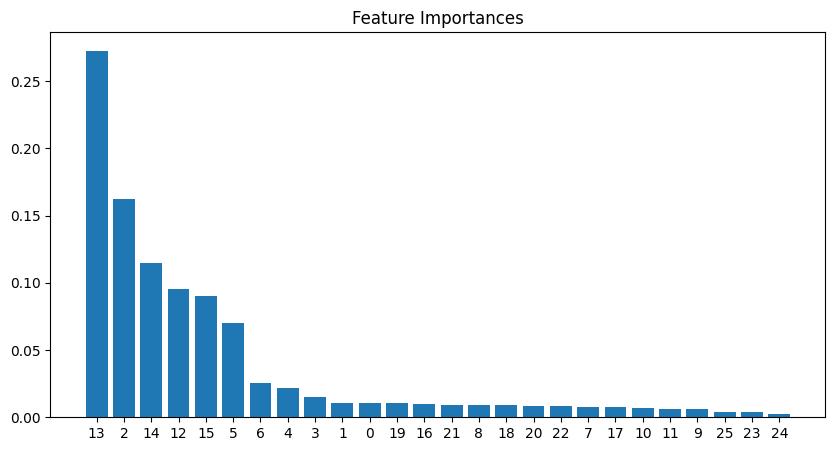

In [30]:
# Get feature importance
feature_importance = rf.feature_importances_

# Sort and plot
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_0313_randomforest.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X_0313_randomforest.shape[1]), indices)
plt.show()

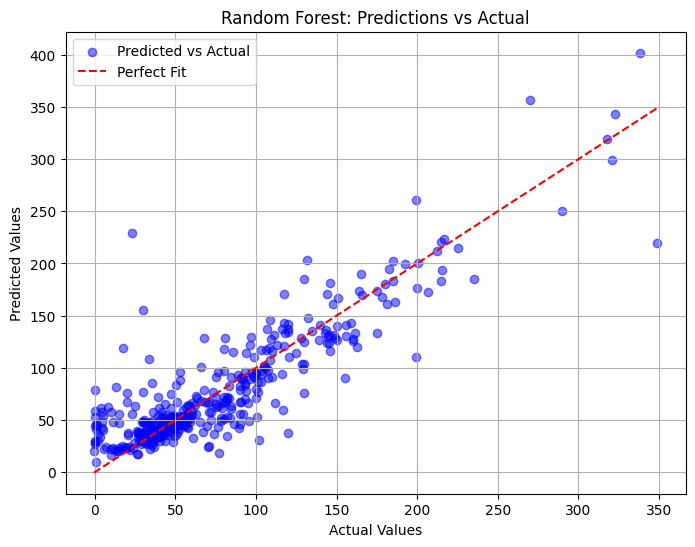

In [31]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_0313_randomforest, y_pred_0313_randomforest, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test_0313_randomforest), max(y_test_0313_randomforest)], [min(y_test_0313_randomforest), max(y_test_0313_randomforest)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()


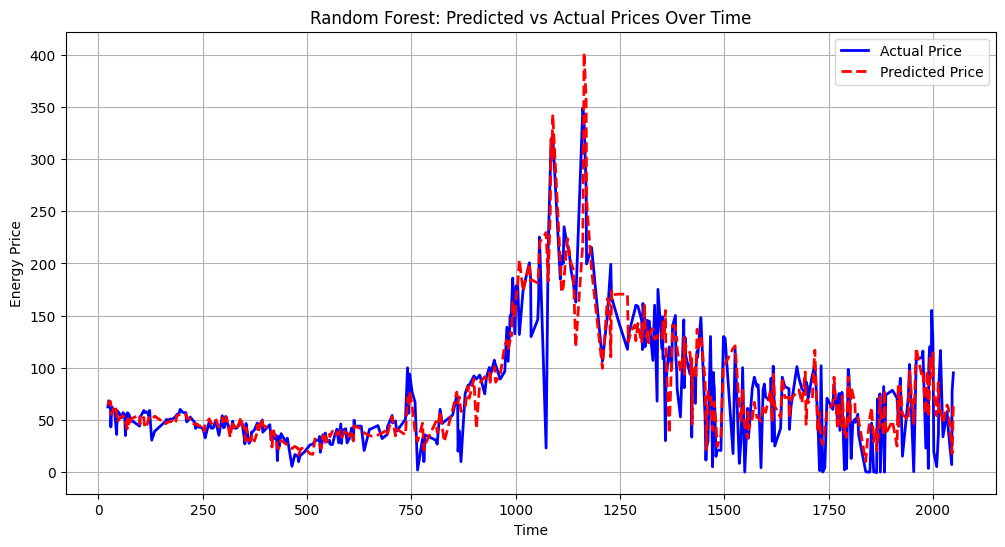

In [32]:
# Assuming X_test has a DateTime index or a corresponding time column
time_series = X_test_0313_randomforest.index if isinstance(X_test_0313_randomforest, pd.DataFrame) else range(len(y_test_0313_randomforest))

# Sort values by time (just in case)
sorted_indices = np.argsort(time_series)
time_series_sorted = np.array(time_series)[sorted_indices]
y_test_sorted = np.array(y_test_0313_randomforest)[sorted_indices]
y_pred_sorted = np.array(y_pred_0313_randomforest)[sorted_indices]

# Plot actual vs predicted over time
plt.figure(figsize=(12, 6))
plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_sorted, label="Predicted Price", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Random Forest: Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Random forest tiende a suavizar
# No es capaz de predecir el pico

# En mi caso es mas importante saber la tendencia



# crear un detector de picos en los datos ??
# error total y error sin picos


# menos honesto
# windsorizar los datos - meter todo entre el percentil 5 y el percentil 95


# Entrenar sin picos? suavizar sin picos

# problema de regresion lineal y train linea con outliers - usar para train o no?


# Expectation short fall of 95th percentile

# la media de los dias que está mal, cuanto nos la vamos a pegar

# rolling window de pandas y mirar como alinear

# SMA_180 o 182 - 30 dias? 

# SMA 3 4 7 esta bien, pero mas mejor 14 - 30 - 60 - 90 - 180 - 360

# esto depende del horizonte

## XGBoost

In [33]:
# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

#! Pending on 95th, 99th percentile errors ???

XGBoost MSE: 1336.7446
XGBoost R²: 0.6955


## LightGBM

In [34]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Define model parameters
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 31,
    "learning_rate": 0.1,
    "verbose": -1
}

# Train with early stopping using callbacks
lgbm = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]  # Correct usage
)

# Make predictions
y_pred_lgb = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

# Evaluate performance
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f"LightGBM MSE: {mse_lgb:.4f}")

Training until validation scores don't improve for 10 rounds
[10]	valid_0's rmse: 39.0297
[20]	valid_0's rmse: 34.6235
[30]	valid_0's rmse: 34.2619
Early stopping, best iteration is:
[29]	valid_0's rmse: 34.2494
LightGBM MSE: 1173.0187


## XGBoost vs LightGBM performance

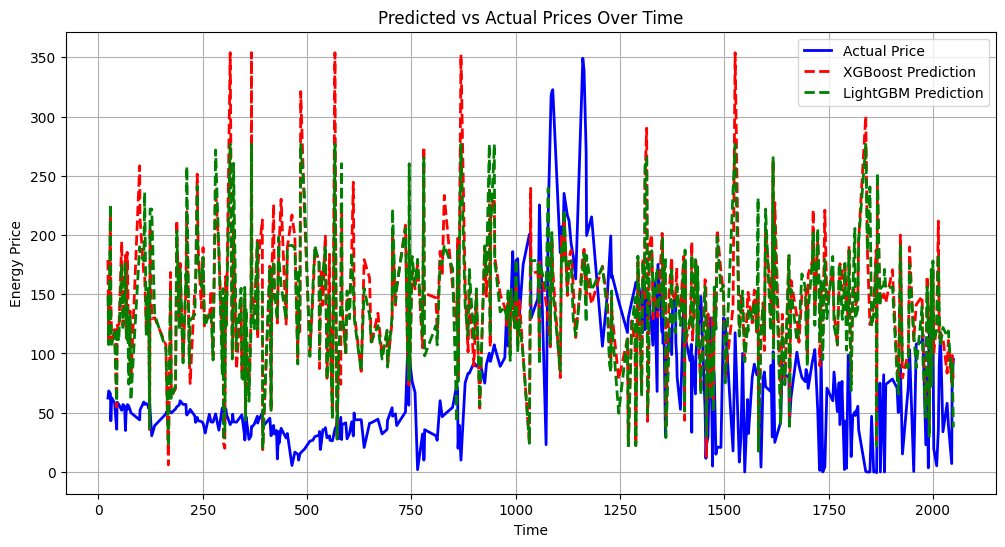

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_xgb[sorted_indices], label="XGBoost Prediction", color="red", linestyle="dashed", linewidth=2)
plt.plot(time_series_sorted, y_pred_lgb[sorted_indices], label="LightGBM Prediction", color="green", linestyle="dashed", linewidth=2)

plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Peak analysis

In [36]:
# Analyze how many peaks, how many outliers


## Change of approach to use Memory (a sliding window) for "mini" models

In [37]:
from utils import mini_models

In [38]:
# Read DB
csv_db_file = '../data/hour_14_metrics.csv'
df_sw = pd.read_csv(csv_db_file, parse_dates=['Datetime'])
df_sw = df_sw[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

____________ X_subset_to_trim
          0      1      2
0      2.30  48.02  52.00
1     48.02  52.00  48.19
2     52.00  48.19  52.02
3     48.19  52.02  52.07
4     52.02  52.07  54.07
...     ...    ...    ...
2625   7.10  77.32  77.87
2626  77.32  77.87  70.01
2627  77.87  70.01  95.12
2628  70.01  95.12  18.82
2629  95.12  18.82   0.00

[2630 rows x 3 columns]
____________ END X_subset_to_trim
____________ y_subset_to_trim
0       48.19
1       52.02
2       52.07
3       54.07
4       69.42
        ...  
2625    70.01
2626    95.12
2627    18.82
2628     0.00
2629    11.37
Length: 2630, dtype: float64
____________ END y_subset_to_trim
Actual vs Predicted:
      Actual    Predicted
0      48.19          NaN
1      52.02          NaN
2      52.07          NaN
3      54.07    51.902238
4      69.42    53.222625
...      ...          ...
2625   70.01    55.622843
2626   95.12    69.015961
2627   18.82    95.374644
2628    0.00   251.474146
2629   11.37  1554.216267

[2630 rows x 2 col

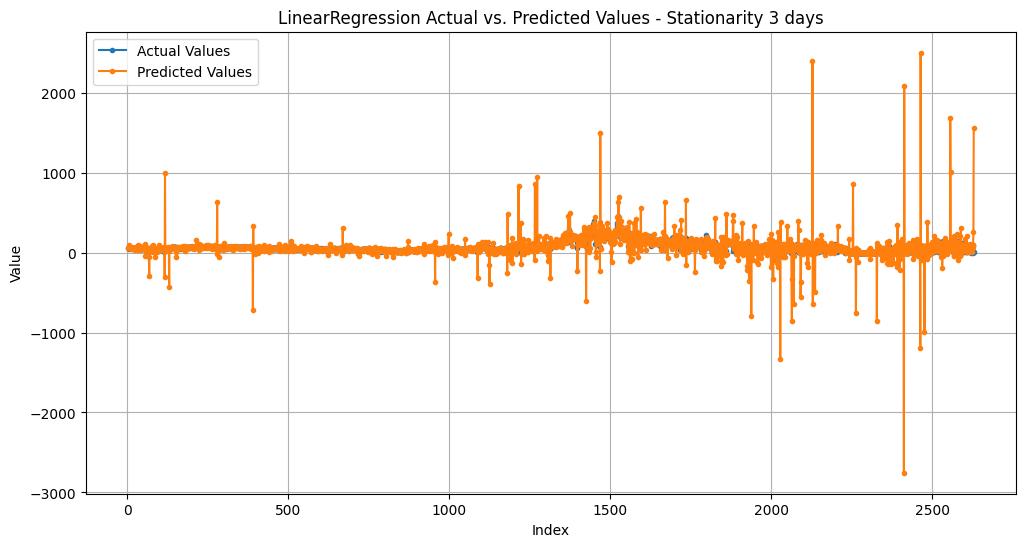

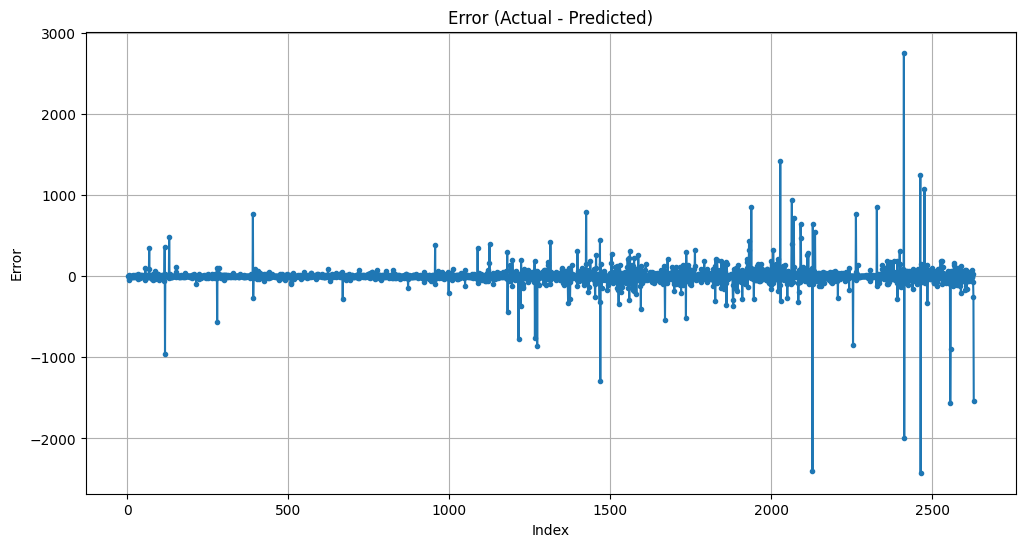

In [39]:
### Short Stationarity (3 rowss)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

print("____________ y_subset_to_trim")
print(y_subset_to_trim)
print("____________ END y_subset_to_trim")

# STEPS
# For loop - as many rows as available in y_subset_to_trim
    # Make subsets of however many rows as stationarity_depth indicates
    
    # Train mini model with subset
    # Predict with the next row of the subset with that model
    
    # Save the predicted value to a y_pred series

# Compare y_subset_to_trim with y_pred in the available indexes

y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')  # Initialize y_pred with same index as y_subset_to_trim

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Training the mini model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted value
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

# Calculating the error
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

____________ X_subset_to_trim
          0      1      2
0      2.30  48.02  52.00
1     48.02  52.00  48.19
2     52.00  48.19  52.02
3     48.19  52.02  52.07
4     52.02  52.07  54.07
...     ...    ...    ...
2625   7.10  77.32  77.87
2626  77.32  77.87  70.01
2627  77.87  70.01  95.12
2628  70.01  95.12  18.82
2629  95.12  18.82   0.00

[2630 rows x 3 columns]
____________ END X_subset_to_trim
____________ y_subset_to_trim
0       48.19
1       52.02
2       52.07
3       54.07
4       69.42
        ...  
2625    70.01
2626    95.12
2627    18.82
2628     0.00
2629    11.37
Length: 2630, dtype: float64
____________ END y_subset_to_trim
Actual vs Predicted:
      Actual  Predicted
0      48.19        NaN
1      52.02        NaN
2      52.07        NaN
3      54.07        NaN
4      69.42        NaN
...      ...        ...
2625   70.01  60.773924
2626   95.12  64.058642
2627   18.82  82.409781
2628    0.00  26.379231
2629   11.37  21.522040

[2630 rows x 2 columns]

Error:
365      3

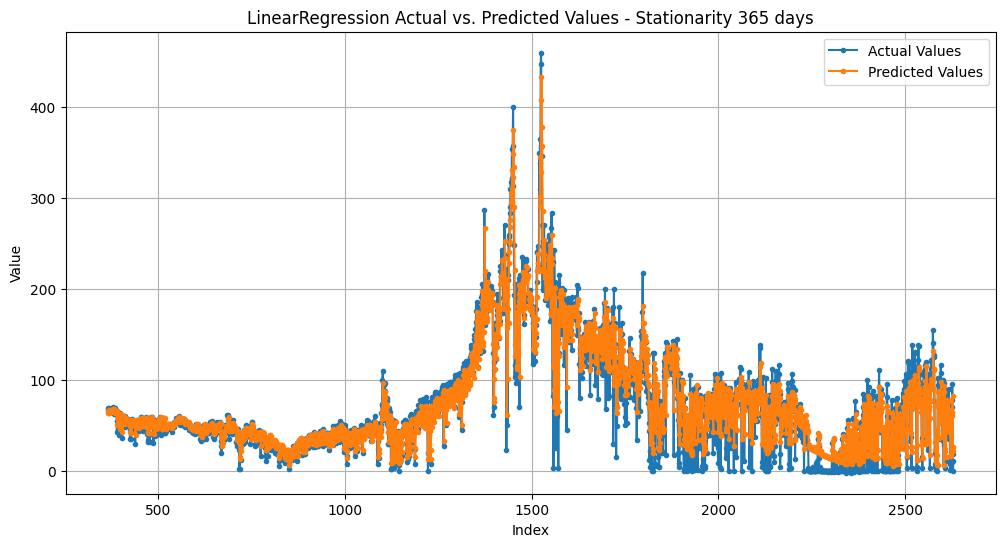

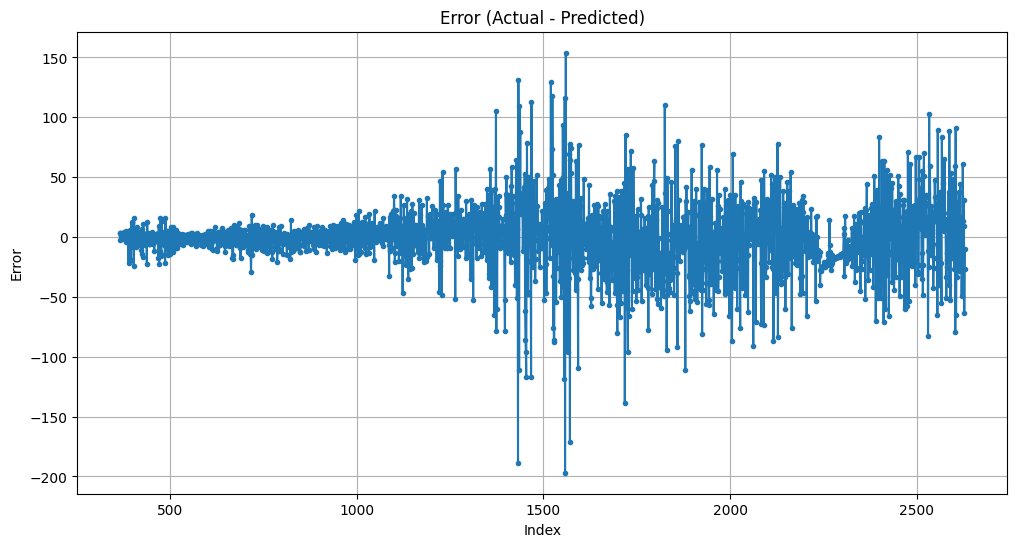

In [40]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 365 # * 4

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

print("____________ y_subset_to_trim")
print(y_subset_to_trim)
print("____________ END y_subset_to_trim")

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

Now using more features:

In [41]:
# def create_weight_matrix(data, window_size, target_col='MarginalES'):
#     """
#     Creates a feature matrix X with sliding windows of the target column and all other features,
#     and a corresponding target vector y containing the next price value.
    
#     Parameters:
#     - data: DataFrame with 'Datetime' and multiple feature columns
#     - window_size: Size of the sliding window
#     - target_col: Name of the column to predict (default: 'MarginalES')
    
#     Returns:
#     - X: DataFrame with sliding windows features
#     - y: Series with target values (next price after each window)
#     """
#     # Remove datetime column if it exists
#     if 'Datetime' in data.columns:
#         data = data.drop('Datetime', axis=1)
    
#     # Get the number of features (columns)
#     n_features = data.shape[1]
    
#     # Initialize empty lists
#     X_data = []
#     y_data = []
    
#     # For each possible window start position
#     for i in range(len(data) - window_size):
#         # Get the window of data
#         window = data.iloc[i:i+window_size]
        
#         # Flatten the window into a single row
#         row = window.values.flatten()
        
#         # Add to X
#         X_data.append(row)
        
#         # Get the target value (next value of target column after window)
#         y_data.append(data[target_col].iloc[i + window_size])
    
#     # Convert to DataFrame and Series
#     X_df = pd.DataFrame(X_data)
#     y_series = pd.Series(y_data)
    
#     return X_df, y_series

In [42]:
# Read DB w features
# csv_db_file = '../data/hour_14_metrics.csv'
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
df_sw = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df_sw = df_sw[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df_features = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

In [43]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

____________ X_subset_to_trim
          0      1      2
0     66.58  67.20  68.12
1     67.20  68.12  64.64
2     68.12  64.64  57.39
3     64.64  57.39  63.91
4     57.39  63.91  65.22
...     ...    ...    ...
2048   7.10  77.32  77.87
2049  77.32  77.87  70.01
2050  77.87  70.01  95.12
2051  70.01  95.12  18.82
2052  95.12  18.82   0.00

[2053 rows x 3 columns]
____________ END X_subset_to_trim
Actual vs Predicted:
      Actual    Predicted
0      64.64          NaN
1      57.39          NaN
2      63.91          NaN
3      65.22    81.413376
4      65.88    49.425326
...      ...          ...
2048   70.01    55.622843
2049   95.12    69.015961
2050   18.82    95.374644
2051    0.00   251.474146
2052   11.37  1554.216267

[2053 rows x 2 columns]

Error:
3        -16.193376
4         16.454674
5         -2.180468
6          3.944840
7          8.033840
           ...     
2048      14.387157
2049      26.104039
2050     -76.554644
2051    -251.474146
2052   -1542.846267
Length: 2050,

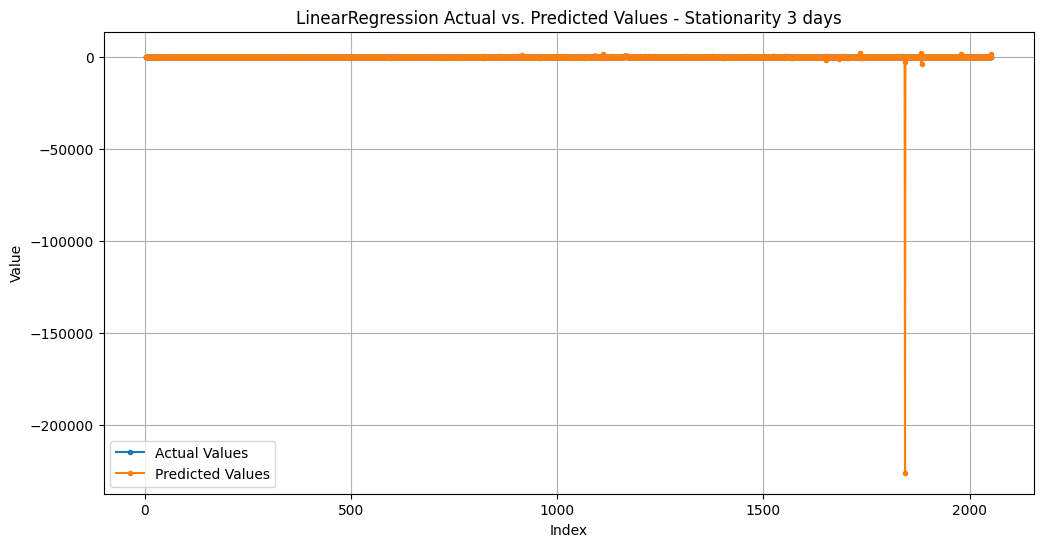

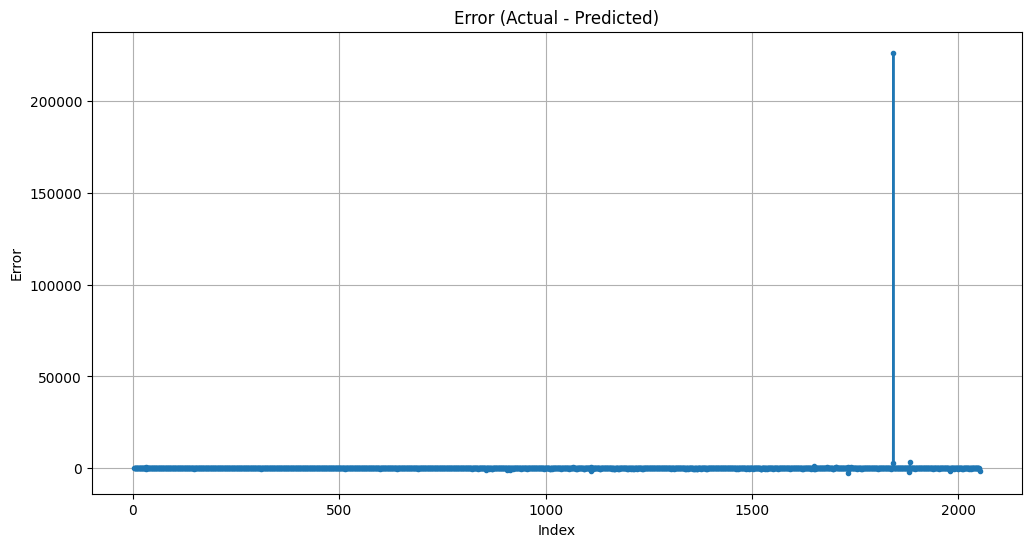

In [44]:
plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

Now changing to Lasso for different weights

____________ X_subset_to_trim
          0      1      2
0     66.58  67.20  68.12
1     67.20  68.12  64.64
2     68.12  64.64  57.39
3     64.64  57.39  63.91
4     57.39  63.91  65.22
...     ...    ...    ...
2048   7.10  77.32  77.87
2049  77.32  77.87  70.01
2050  77.87  70.01  95.12
2051  70.01  95.12  18.82
2052  95.12  18.82   0.00

[2053 rows x 3 columns]
____________ END X_subset_to_trim


c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.152e-01, tolerance: 2.826e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.847e-02, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\PV783RR\OneDrive - EY\Documents\uc3m\TFG\TFG\.tfg_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Actual vs Predicted:
      Actual   Predicted
0      64.64         NaN
1      57.39         NaN
2      63.91         NaN
3      65.22   81.256907
4      65.88   60.334054
...      ...         ...
2048   70.01   69.574986
2049   95.12   69.874175
2050   18.82   96.378003
2051    0.00  249.900035
2052   11.37  841.287169

[2053 rows x 2 columns]

Error:
3       -16.036907
4         5.545946
5        -2.039324
6         3.089370
7         4.796378
           ...    
2048      0.435014
2049     25.245825
2050    -77.558003
2051   -249.900035
2052   -829.917169
Length: 2050, dtype: float64


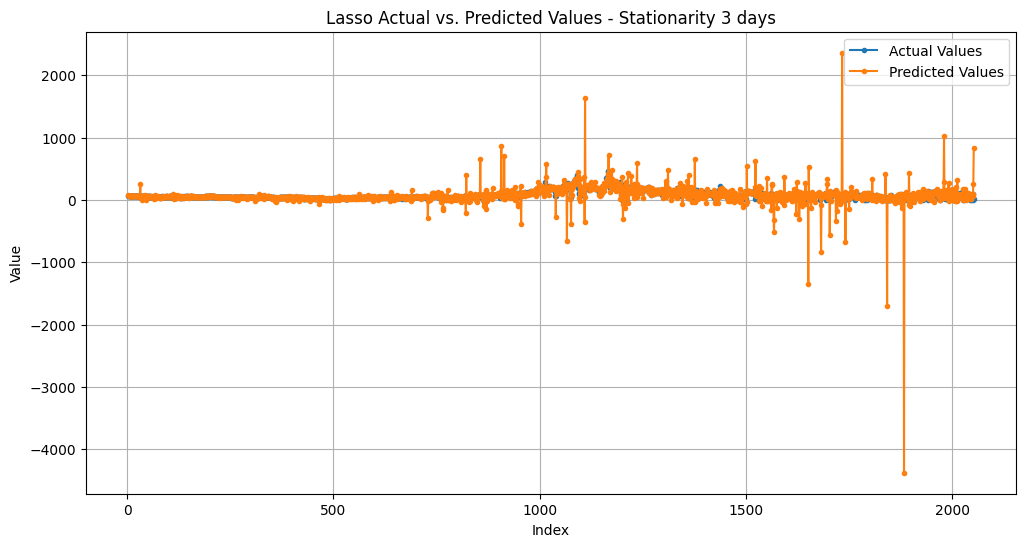

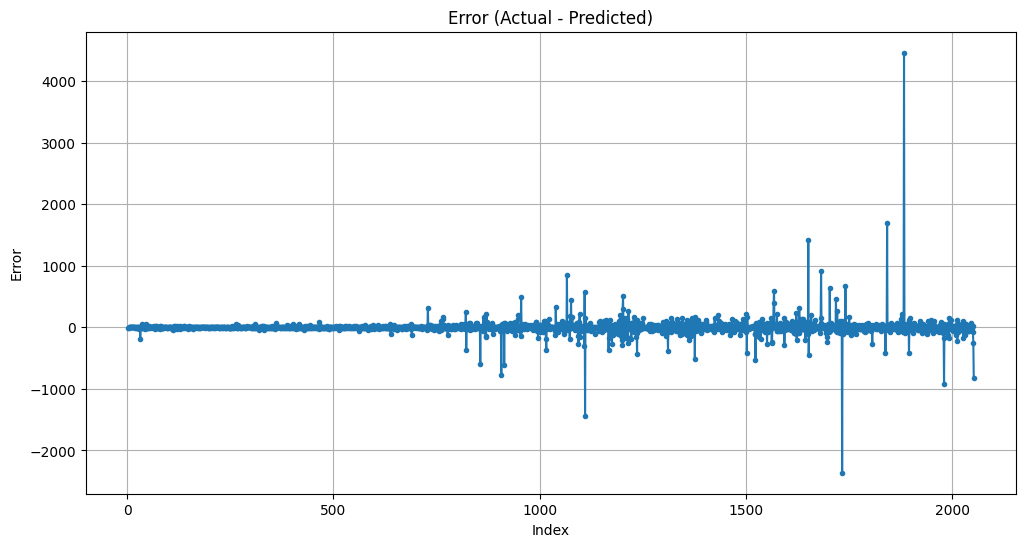

In [45]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")


# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = Lasso()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    # X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    X_predict = X_subset_to_trim.iloc[[i + stationarity_depth]]  # Keep as DataFrame with column names - useful for feature importance
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

# Corrected the procedure

In [4]:
# Read DB w features
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

# Read all columns from the CSV file
df_sw = pd.read_csv(csv_db_file, parse_dates=['Datetime'])

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

# Filter by date range but keep all columns
subset_df_features = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

In [6]:
###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

model = LinearRegression()

valid_pred, valid_actual, error, X_combined = mini_model(model, subset_df_features, window_size, stationarity_depth)

🔍 Creating weight matrix with features...
2025-05-08 09:31:00,934 - utils.mini_models - INFO - 🔍 Creating weight matrix with features...
⚙️ Starting training loop...
2025-05-08 09:31:02,301 - utils.mini_models - INFO - ⚙️ Starting training loop...


In [7]:
errors_series = pd.Series(error)
Q1 = errors_series.quantile(0.25)
Q3 = errors_series.quantile(0.75)
IQR = Q3 - Q1

# Definir outliers como puntos con error absoluto > Q3 + 1.5 * IQR
outlier_threshold = Q3 + 1.5 * IQR

In [11]:
mask = error < outlier_threshold
valid_actual_filtered = valid_actual[mask]
valid_pred_filtered = valid_pred[mask]

In [ ]:
# Asegúrate de que las fechas son una Serie o lista del mismo tamaño
# y_pred, y_test y dates deben tener el mismo índice
errors = np.abs(valid_pred - valid_actual)

# Cálculo del IQR para identificar outliers
errors_series = pd.Series(errors)
Q1 = errors_series.quantile(0.25)
Q3 = errors_series.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# Crear DataFrame para analizar
df_errors = pd.DataFrame({
    # 'Date': dates,
    'Actual': valid_actual,
    'Predicted': valid_pred,
    'AbsoluteError': errors
})

# Detectar los días con errores outliers
outlier_days = df_errors[df_errors['AbsoluteError'] > outlier_threshold]

# Mostrar ordenados por error descendente
outlier_days_sorted = outlier_days.sort_values(by='AbsoluteError', ascending=False)

# print(outlier_days_sorted[['Date', 'Actual', 'Predicted', 'AbsoluteError']])
print(outlier_days_sorted[['Actual', 'Predicted', 'AbsoluteError']])

      Actual     Predicted  AbsoluteError
1676  114.56 -79007.793467   79122.353467
1893    0.00 -45384.026929   45384.026929
2011  102.45 -32133.363023   32235.813023
1740   51.60 -16335.409922   16387.009922
1863   41.49 -12703.944358   12745.434358
...      ...           ...            ...
1704   82.18     -7.346508      89.526508
1666   79.70     -9.655568      89.355568
770    54.51    143.787330      89.277330
1962   96.43      7.163281      89.266719
1438  217.60    128.758902      88.841098

[195 rows x 3 columns]


In [18]:
# Define the threshold
threshold = 88

# Copy errors
normalized_errors = df_errors['AbsoluteError'].copy()

# Select only outliers (errors > threshold)
outlier_mask = normalized_errors > threshold

# Normalize those values using Min-Max normalization
outliers = normalized_errors[outlier_mask]
normalized_outliers = (outliers - outliers.min()) / (outliers.max() - outliers.min())

# Replace in the original Series
normalized_errors[outlier_mask] = normalized_outliers

# Add the column to your DataFrame
df_errors['NormalizedError'] = normalized_errors

In [21]:
# Cap the error values
clipped_errors = df_errors['AbsoluteError'].clip(upper=88)

# Normalize all errors
df_errors['NormalizedError'] = (clipped_errors - clipped_errors.min()) / (clipped_errors.max() - clipped_errors.min())

In [22]:
# Remove rows where AbsoluteError > 88
df_no_outliers = df_errors[df_errors['AbsoluteError'] <= 88].copy()

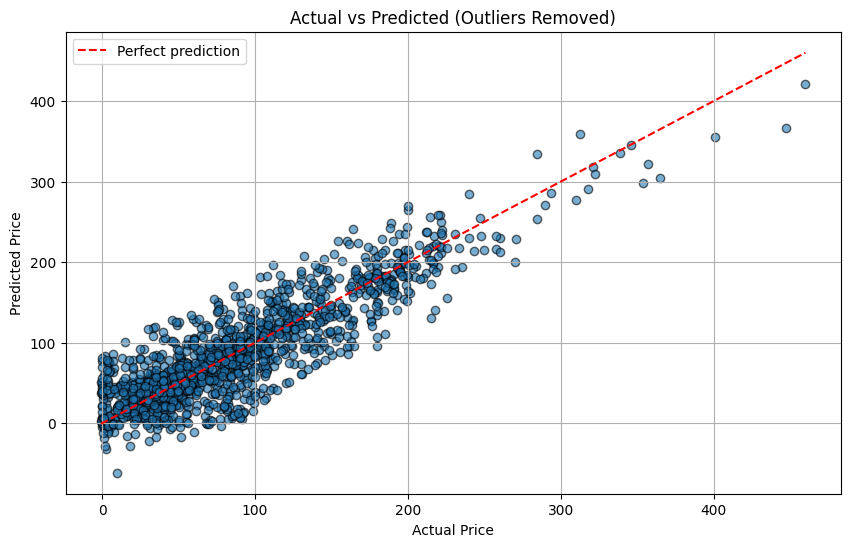

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['Actual'], df_no_outliers['Predicted'], alpha=0.6, edgecolors='k')
plt.plot([df_no_outliers['Actual'].min(), df_no_outliers['Actual'].max()],
         [df_no_outliers['Actual'].min(), df_no_outliers['Actual'].max()],
         color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Outliers Removed)')
plt.legend()
plt.grid(True)
plt.show()

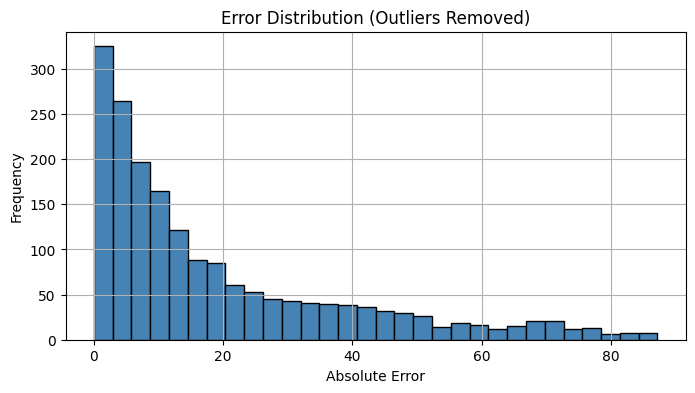

In [24]:
plt.figure(figsize=(8, 4))
plt.hist(df_no_outliers['AbsoluteError'], bins=30, color='steelblue', edgecolor='black')
plt.title('Error Distribution (Outliers Removed)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [25]:
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Date'])  # Only if needed
df_no_outliers = df_no_outliers.sort_values('Date')  # Sort by date if not already


KeyError: 'Date'

In [ ]:
# === PARAMETERS ===
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
start_date = '2018-01-01'
end_date = '2025-03-18'
window_size = 3
stationarity_depth = 3
threshold = 88  # Outlier threshold for error

# === LOAD DATA ===
df_sw = pd.read_csv(csv_db_file, parse_dates=['Datetime'])
subset_df_features = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)].copy()

# === MINI MODEL EXECUTION ===
model = LinearRegression()
valid_pred, valid_actual, error, X_combined = mini_model(model, subset_df_features, window_size, stationarity_depth)


🔍 Creating weight matrix with features...
2025-05-08 10:27:30,641 - utils.mini_models - INFO - 🔍 Creating weight matrix with features...
⚙️ Starting training loop...
2025-05-08 10:27:31,130 - utils.mini_models - INFO - ⚙️ Starting training loop...


In [ ]:
# === BUILD ERROR DATAFRAME ===
errors = np.abs(valid_pred - valid_actual)
dates = subset_df_features['Datetime'].iloc[-len(valid_actual):].reset_index(drop=True)  # Align dates

df_errors = pd.DataFrame({
    'Date': dates,
    'Actual': valid_actual,
    'Predicted': valid_pred,
    'AbsoluteError': errors
})

# === IDENTIFY OUTLIERS ===
Q1 = errors.quantile(0.25)
Q3 = errors.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outlier_days = df_errors[df_errors['AbsoluteError'] > outlier_threshold]
outlier_days_sorted = outlier_days.sort_values(by='AbsoluteError', ascending=False)
print(outlier_days_sorted[['Date', 'Actual', 'Predicted', 'AbsoluteError']])

# # === NORMALIZE ERRORS (CAP AT 88) ===
# clipped_errors = df_errors['AbsoluteError'].clip(upper=threshold)
# df_errors['NormalizedError'] = (clipped_errors - clipped_errors.min()) / (clipped_errors.max() - clipped_errors.min())

# # === REPLACE ONLY OUTLIERS WITH NORMALIZED VALUES ===
# normalized_errors = df_errors['AbsoluteError'].copy()
# outlier_mask = normalized_errors > threshold
# outliers = normalized_errors[outlier_mask]
# normalized_outliers = (outliers - outliers.min()) / (outliers.max() - outliers.min())
# normalized_errors[outlier_mask] = normalized_outliers
# df_errors['NormalizedError'] = normalized_errors

# # === REMOVE OUTLIERS FOR PLOTTING === (and negative predictions)
# df_no_outliers = df_errors[df_errors['AbsoluteError'] <= threshold].copy()
# df_no_outliers = df_no_outliers[df_no_outliers['Predicted'] >= 0]
# df_no_outliers = df_no_outliers.sort_values('Date')

# # === CAP ERRORS AT THRESHOLD ===
# threshold = 88
# clipped_errors = df_errors['AbsoluteError'].clip(upper=threshold)

# # === NORMALIZE ALL ERRORS (with capping) ===
# df_errors['NormalizedError'] = (clipped_errors - clipped_errors.min()) / (clipped_errors.max() - clipped_errors.min())

# # === SET NEGATIVE PREDICTIONS TO ZERO ===
# df_errors['Predicted'] = df_errors['Predicted'].clip(lower=0)

# # === SORT BY DATE (Optional) ===
# df_errors = df_errors.sort_values('Date')

# # === PLOT CLEANED SERIES ===
# plt.figure(figsize=(14, 6))
# plt.plot(df_no_outliers['Date'], df_no_outliers['Actual'], label='Actual', linewidth=2)
# plt.plot(df_no_outliers['Date'], df_no_outliers['Predicted'], label='Predicted (Outliers Removed)', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Energy Price')
# plt.title('Actual vs Predicted Prices (Outliers Removed)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

df_cleaned = df_errors.copy()

# === STEP 1: Fix outliers by capping predictions to threshold ===
# Only adjust values where error is too high
over_threshold_mask = df_cleaned['AbsoluteError'] > threshold

# Adjust predicted to be within the threshold relative to actual
df_cleaned.loc[over_threshold_mask, 'Predicted'] = (
    df_cleaned.loc[over_threshold_mask, 'Actual'] +
    threshold * np.sign(df_cleaned.loc[over_threshold_mask, 'Predicted'] - df_cleaned.loc[over_threshold_mask, 'Actual'])
)

# === STEP 2: Clip negative predictions to zero (after outlier fix) ===
df_cleaned['Predicted'] = df_cleaned['Predicted'].clip(lower=0)

# === STEP 3: Recalculate absolute error after all adjustments ===
df_cleaned['AbsoluteError'] = np.abs(df_cleaned['Actual'] - df_cleaned['Predicted'])
print(df_cleaned[['Date', 'Actual', 'Predicted', 'AbsoluteError']])

                    Date  Actual     Predicted  AbsoluteError
1676 2023-08-26 14:00:00  114.56 -79007.793467   79122.353467
1893 2024-09-26 14:00:00    0.00 -45384.026929   45384.026929
2011 2025-02-06 14:00:00  102.45 -32133.363023   32235.813023
1740 2023-11-14 14:00:00   51.60 -16335.409922   16387.009922
1863 2024-07-15 14:00:00   41.49 -12703.944358   12745.434358
...                  ...     ...           ...            ...
1704 2023-10-03 14:00:00   82.18     -7.346508      89.526508
1666 2023-08-14 14:00:00   79.70     -9.655568      89.355568
770  2021-02-08 14:00:00   54.51    143.787330      89.277330
1962 2024-12-19 14:00:00   96.43      7.163281      89.266719
1438 2022-12-08 14:00:00  217.60    128.758902      88.841098

[195 rows x 4 columns]
                    Date  Actual   Predicted  AbsoluteError
0    2018-12-31 14:00:00     NaN         NaN            NaN
1    2019-01-01 14:00:00     NaN         NaN            NaN
2    2019-01-02 14:00:00     NaN         NaN        

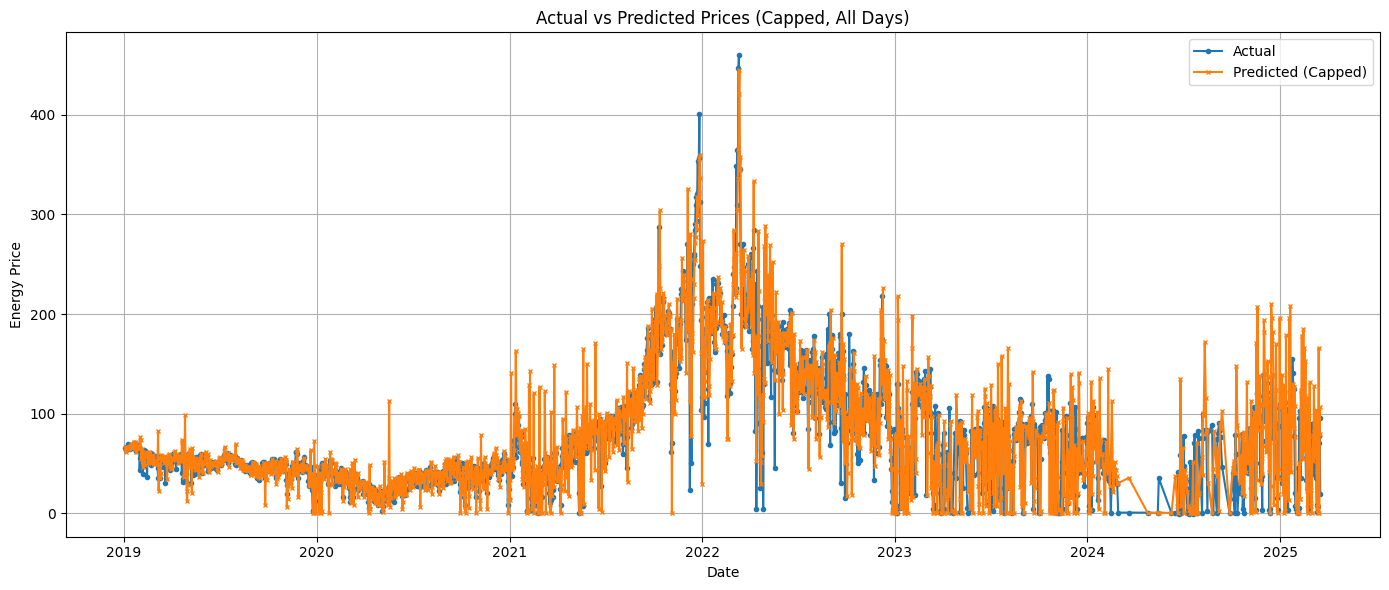

In [36]:
# === Plot with dots ===
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Actual'], label='Actual', marker='o', markersize=3)
plt.plot(df_cleaned['Date'], df_cleaned['Predicted'], label='Predicted (Capped)', marker='x', markersize=3)
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.title('Actual vs Predicted Prices (Capped, All Days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

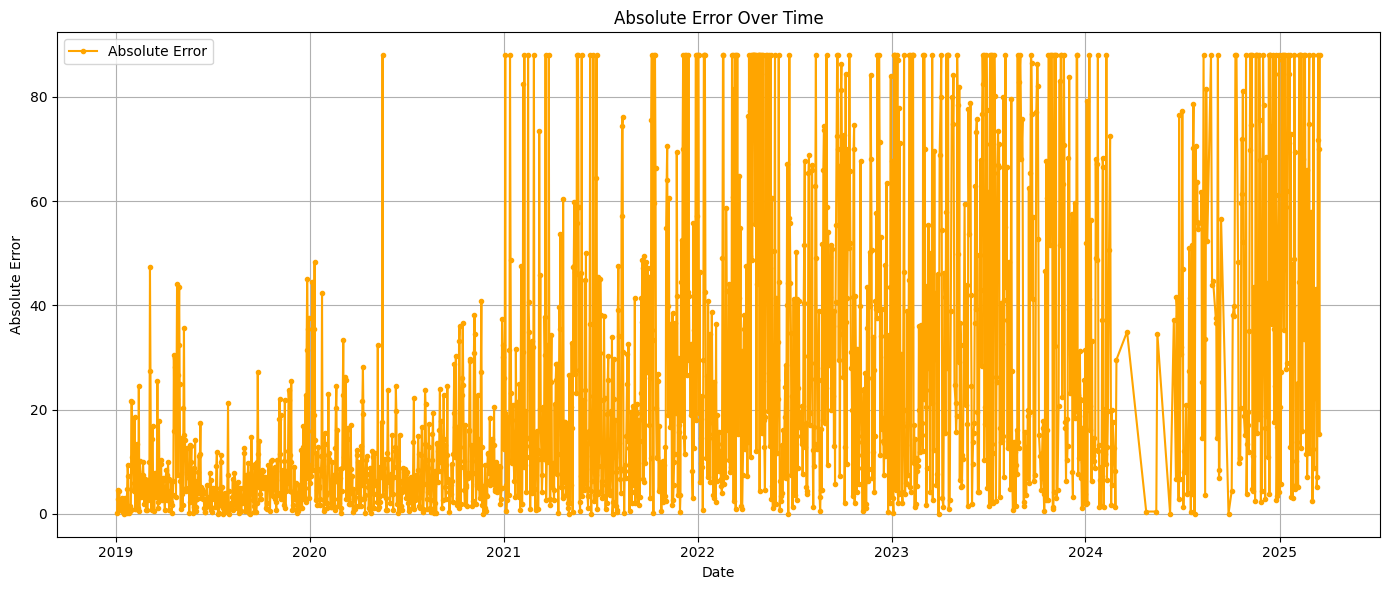

In [39]:
# Plot error
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['Date'], df_cleaned['AbsoluteError'], label='Absolute Error', color='orange', marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Absolute Error')
plt.title('Absolute Error Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


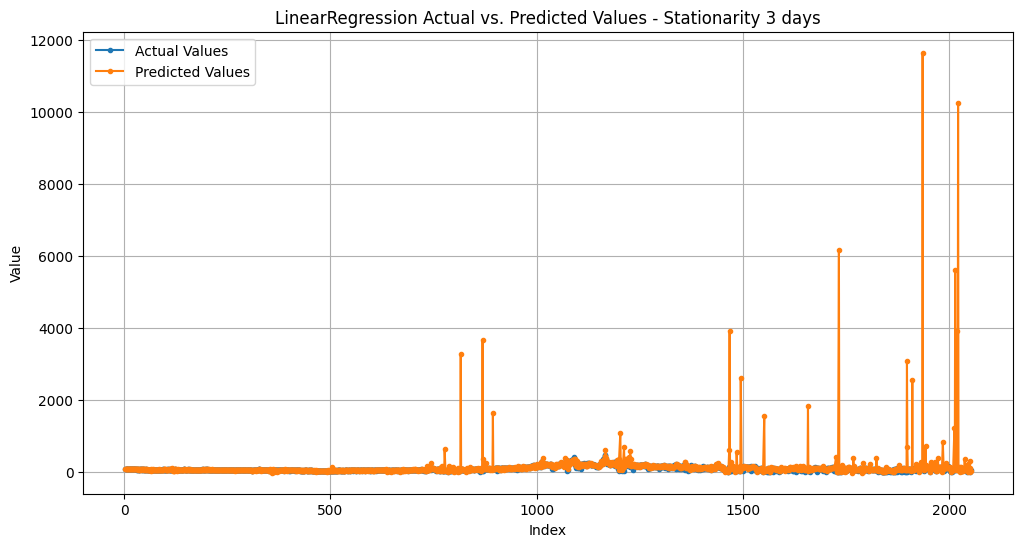

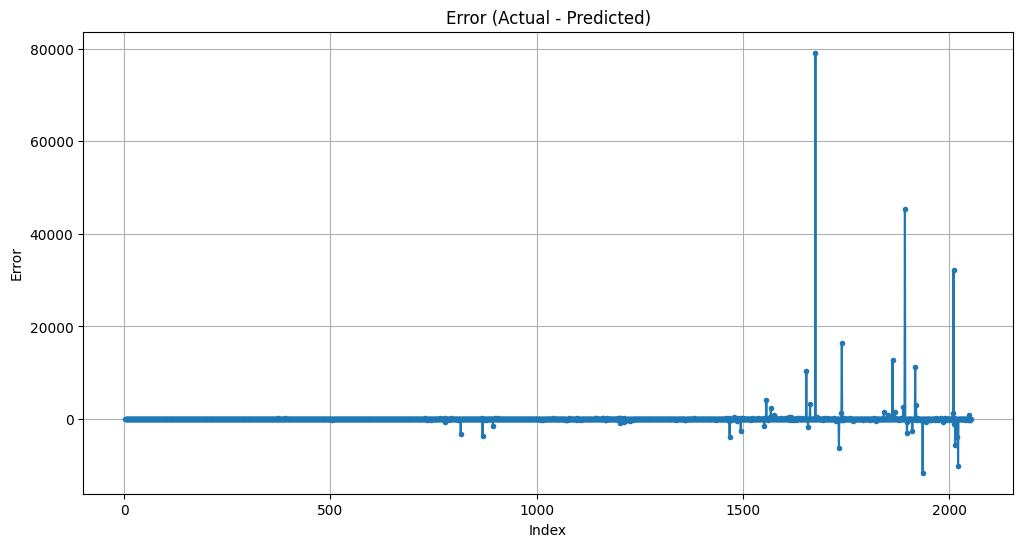

In [ ]:



# # If valid_pred is an outlier, replace it with the mean of the last 3 values
# # residuals = y_true - y_pred
# residuals = valid_actual - valid_pred
# threshold = 3 * np.std(residuals)
# outlier_mask = np.abs(residuals) > threshold

# # Step 3: Replace outliers in y_true
# y_cleaned = valid_actual.copy()

# for idx in np.where(outlier_mask)[0]:
#     if idx >= 3:  # Make sure we have 3 previous points
#         y_cleaned.iloc[idx] = y_cleaned.iloc[idx-3:idx].mean()
#     else:
#         # Not enough past values: use first available mean
#         y_cleaned.iloc[idx] = y_cleaned.iloc[:idx].mean() if idx > 0 else y_cleaned.iloc[0]

plot_actual_vs_predicted(model, valid_actual, valid_pred_filtered, stationarity_depth)
# plot_actual_vs_predicted(model, y_cleaned, valid_pred, stationarity_depth)
plot_error(error)

2025-04-24 12:50:02,726 - INFO - 🔍 Creating weight matrix with features...
2025-04-24 12:50:02,726 - utils.mini_models - INFO - 🔍 Creating weight matrix with features...
2025-04-24 12:50:03,257 - DEBUG - 📐 X_combined shape: (2050, 30)
2025-04-24 12:50:03,257 - utils.mini_models - DEBUG - 📐 X_combined shape: (2050, 30)
2025-04-24 12:50:03,259 - DEBUG - 🧮 Total training steps: 2020
2025-04-24 12:50:03,259 - utils.mini_models - DEBUG - 🧮 Total training steps: 2020
2025-04-24 12:50:03,545 - INFO - ♻️ All step models found — skipping training and loading predictions.
2025-04-24 12:50:03,545 - utils.mini_models - INFO - ♻️ All step models found — skipping training and loading predictions.
2025-04-24 12:50:13,555 - DEBUG - 📊 Actual vs Predicted:
2025-04-24 12:50:13,555 - utils.mini_models - DEBUG - 📊 Actual vs Predicted:
2025-04-24 12:50:13,976 - DEBUG -       Actual     Predicted
30     60.10     46.968338
31     55.84     61.353234
32     39.07     72.286355
33     47.09     35.922214
34   

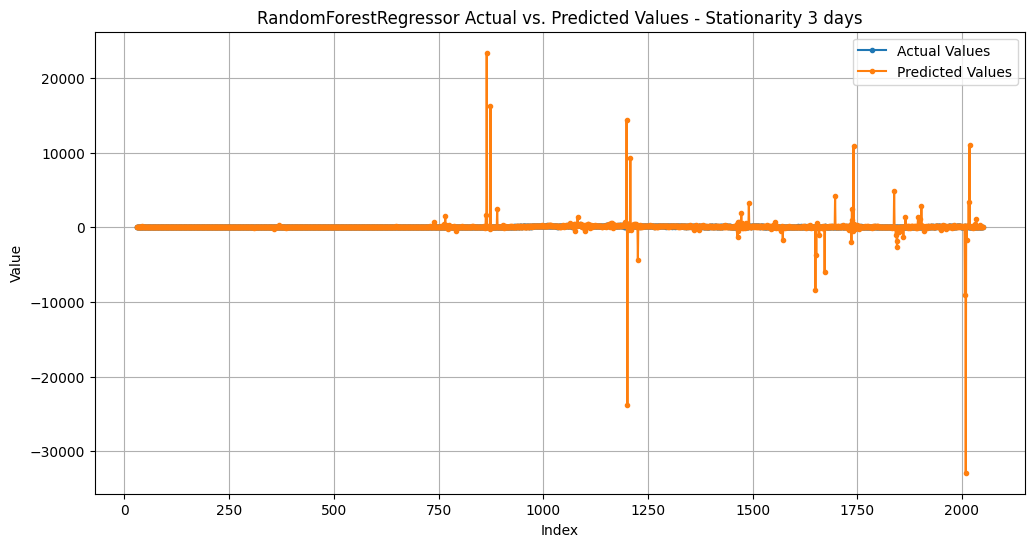

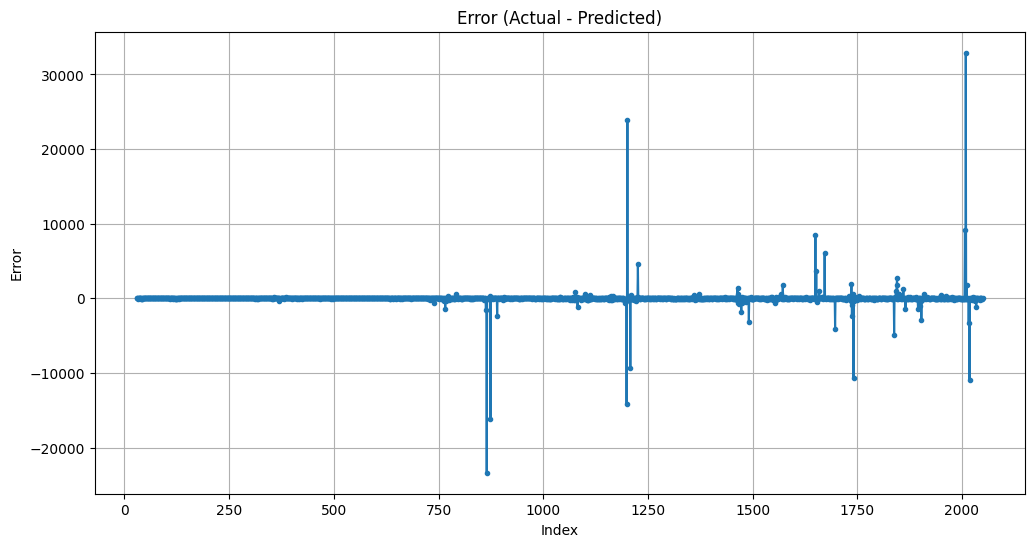

In [70]:
###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

from utils.mini_models import mini_model

importlib.reload(utils.mini_models)

# model = Lasso()
# valid_pred, valid_actual, error, X_combined = mini_model(model, subset_df_features, window_size, stationarity_depth)

alpha = 0.05

valid_pred, valid_actual, error, X_combined = mini_model(
    model = Lasso(alpha = alpha),
    subset_df_features = subset_df_features,
    window_size = 7,
    stationarity_depth = 30,
    model_name = f"lasso_alpha_{alpha}_ws_{window_size}_sd_{stationarity_depth}",
    save_dir = f"models/lasso_alpha_{alpha}", # if not should default /models/model_name folder
    debug = True,  # Enable detailed output
    save_every_step = True,
)


plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [79]:
importlib.reload(utils.mini_models)

<module 'utils.mini_models' from 'c:\\Users\\PV783RR\\OneDrive - EY\\Documents\\uc3m\\TFG\\TFG\\code\\utils\\mini_models.py'>

In [81]:
importlib.reload(utils.mini_models)

###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

model = RandomForestRegressor()

valid_pred, valid_actual, error, X_combined = mini_model(
    model = Lasso(alpha = alpha),
    subset_df_features = subset_df_features,
    window_size = 7,
    stationarity_depth = 30,
    model_name = f"random_forest_ws_{window_size}_sd_{stationarity_depth}",
    save_dir = f"models/random_forest", # if not should default /models/model_name folder
    debug = True,  # Enable detailed output
    save_every_step = True,
)

valid_pred, valid_actual, error, X_combined = mini_model(model, subset_df_features, window_size, stationarity_depth)

2025-04-24 13:15:51,880 - INFO - 🔍 Creating weight matrix with features...
2025-04-24 13:15:51,880 - utils.mini_models - INFO - 🔍 Creating weight matrix with features...
2025-04-24 13:15:52,319 - DEBUG - 📐 X_combined shape: (2050, 30)
2025-04-24 13:15:52,319 - utils.mini_models - DEBUG - 📐 X_combined shape: (2050, 30)
2025-04-24 13:15:52,322 - DEBUG - 🧮 Total training steps: 2020
2025-04-24 13:15:52,322 - utils.mini_models - DEBUG - 🧮 Total training steps: 2020
2025-04-24 13:15:52,463 - INFO - ♻️ All step models found — skipping training and loading predictions.
2025-04-24 13:15:52,463 - utils.mini_models - INFO - ♻️ All step models found — skipping training and loading predictions.
2025-04-24 13:15:56,038 - DEBUG - 📊 Actual vs Predicted:
2025-04-24 13:15:56,038 - utils.mini_models - DEBUG - 📊 Actual vs Predicted:
2025-04-24 13:15:56,131 - DEBUG -       Actual     Predicted
30     60.10     46.968338
31     55.84     61.353234
32     39.07     72.286355
33     47.09     35.922214
34   

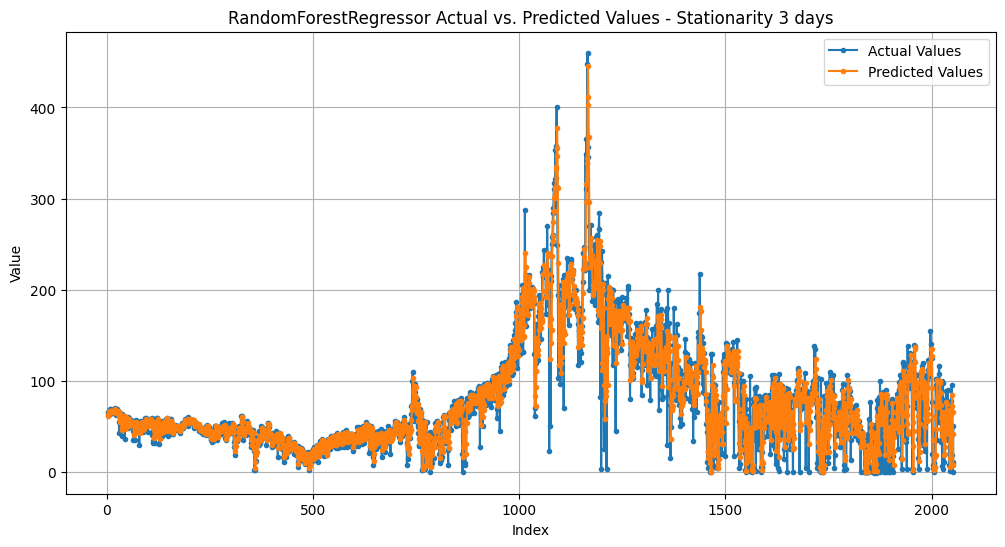

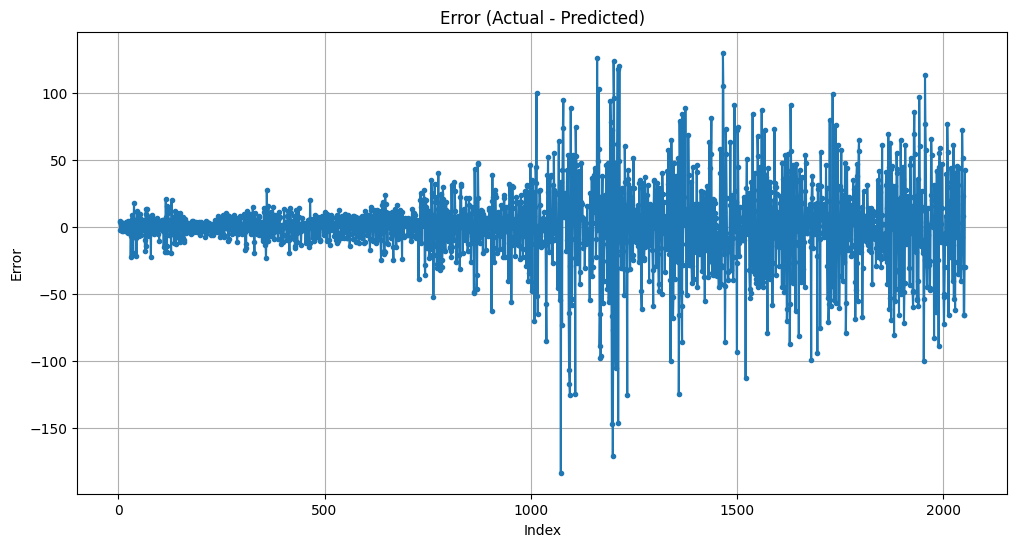

In [74]:
plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

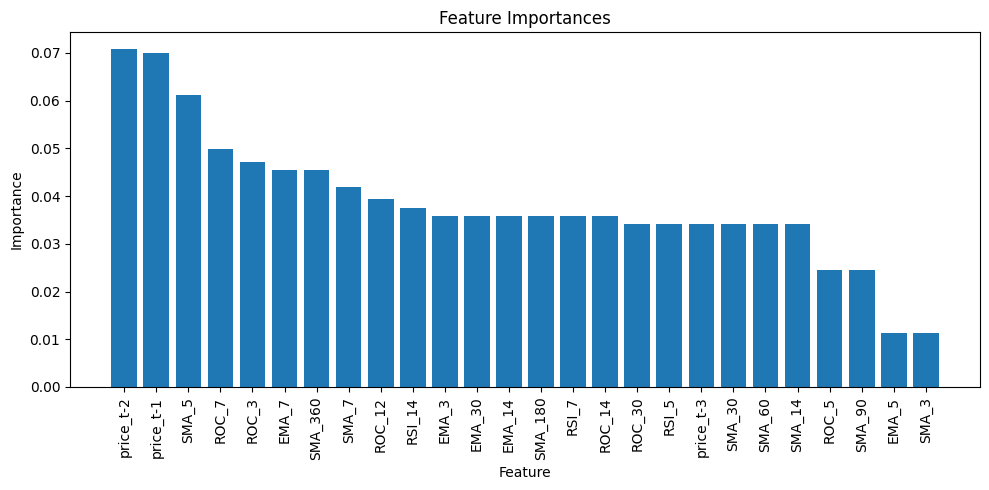

In [59]:
# Most relevant features of the Random Forest
# Get feature importance
plot_feature_importance(model, X_combined)

# feature_importance = model.feature_importances_
# # Sort and plot
# indices = np.argsort(feature_importance)[::-1]
# plt.figure(figsize=(10, 5))
# plt.title("Feature Importances")
# # Feature names
# feature_names = X_combined.columns.tolist()
# # Sort feature names according to importance
# sorted_feature_names = [feature_names[i] for i in indices]
# plt.bar(range(X_combined.shape[1]), feature_importance[indices], align="center")
# plt.xticks(range(X_combined.shape[1]), sorted_feature_names, rotation=90)
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.tight_layout()
# plt.show()

## Deep Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the most complex RF model possible
complex_rf = RandomForestRegressor(
    n_estimators=500,          # Large number of trees
    max_depth=None,            # Unlimited depth
    min_samples_split=2,       # Minimum to continue splitting
    min_samples_leaf=1,        # Allow leaf nodes with just 1 sample
    max_features='sqrt',       # Consider sqrt(n_features) features per split
    bootstrap=True,            # Use bootstrap samples
    random_state=42,           # For reproducibility
    n_jobs=-1                  # Use all available cores
)

In [ ]:
def optimized_rf_model(subset_df_features, window_size, stationarity_depth):
    """
    Create an optimized Random Forest model using grid search and cross-validation
    with a sliding window approach for time series data.
    """
    from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
    from sklearn.metrics import mean_squared_error, r2_score
    import numpy as np
    
    # Create feature matrix
    X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
    
    # Define parameter grid from most complex to simpler
    param_grid = {
        'n_estimators': [500, 250, 100, 50],
        'max_depth': [None, 30, 20, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # Initialize base model
    base_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    
    # Grid search with time series cross-validation
    grid_search = GridSearchCV(
        estimator=base_rf,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Find optimal parameters using the full dataset
    grid_search.fit(X_combined, y_subset_to_trim)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {-grid_search.best_score_}")
    
    # Get the optimized model
    optimized_model = grid_search.best_estimator_
    
    # Now use the optimized model with the original sliding window approach
    y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')
    
    for i in range(y_subset_to_trim.size - stationarity_depth):
        # Make subsets for training of the specified depth
        X_train = X_combined.iloc[i:i + stationarity_depth]
        y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]
        
        # Train model on the current window
        optimized_model.fit(X_train, y_train)
        
        # Predict the NEXT point after the training window
        # Use Pandas instead of NumPy
        # X_predict = X_combined.iloc[i + stationarity_depth].values.reshape(1, -1) 
        X_predict = X_combined.iloc[[i + stationarity_depth]]  # Keep as DataFrame with column names - useful for feature importance
        y_predict = optimized_model.predict(X_predict)[0]
        
        # Save the predicted variable
        y_pred.iloc[i + stationarity_depth] = y_predict
    
    # Compare actual vs predicted
    valid_pred = y_pred.dropna()
    valid_actual = y_subset_to_trim[valid_pred.index]
    error = valid_actual - valid_pred
    
    # Calculate metrics
    mse = mean_squared_error(valid_actual, valid_pred)
    r2 = r2_score(valid_actual, valid_pred)
    
    print(f"\nModel Performance:")
    print(f"MSE: {mse:.6f}")
    print(f"R²: {r2:.6f}")
    print(f"RMSE: {np.sqrt(mse):.6f}")
    
    # Show feature importances
    feature_importance = pd.DataFrame({
        'Feature': X_combined.columns,
        'Importance': optimized_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))
    
    return valid_pred, valid_actual, error, optimized_model

In [56]:
valid_pred, valid_actual, error, optimized_model = optimized_rf_model(subset_df_features, window_size, stationarity_depth)

NameError: name 'optimized_rf_model' is not defined

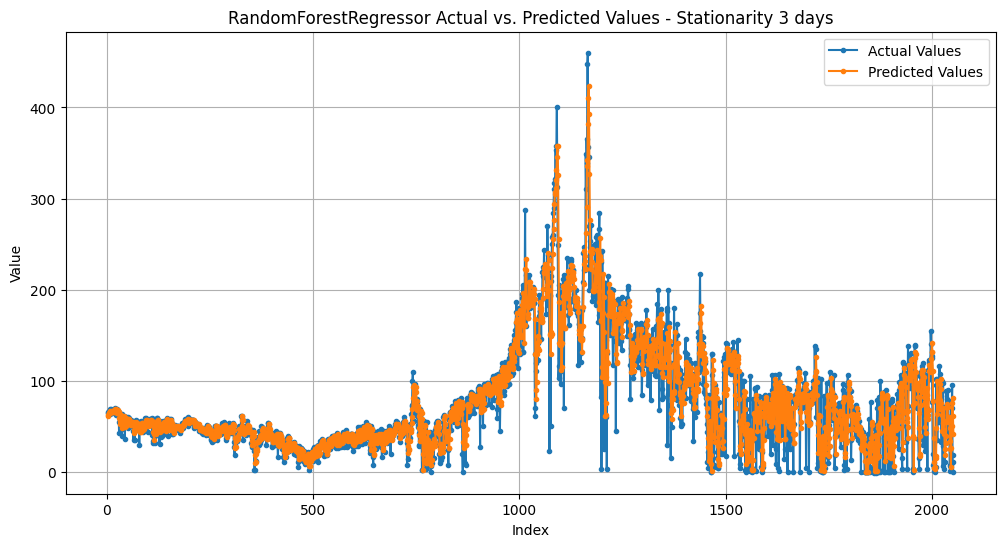

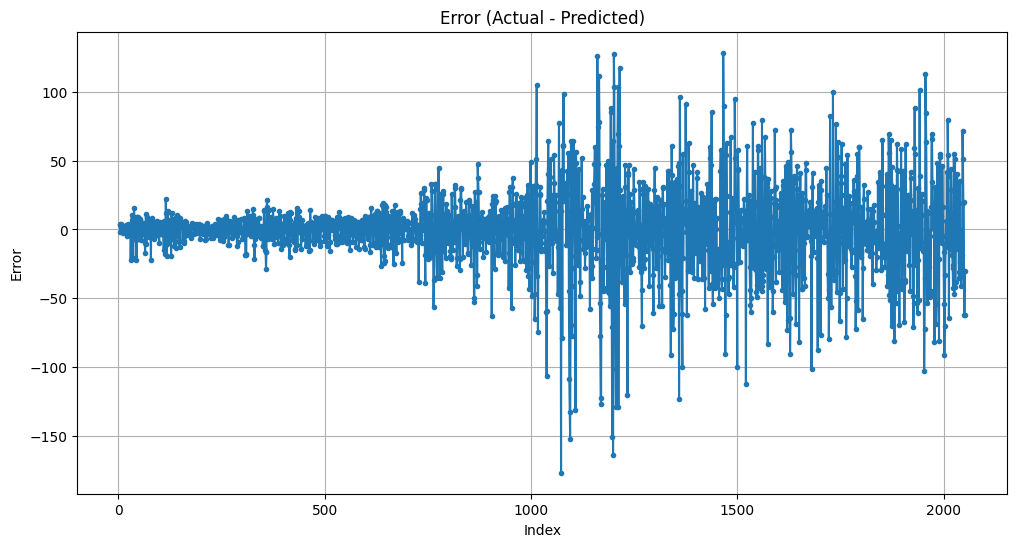

In [ ]:
plot_actual_vs_predicted(optimized_model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [55]:
# Most relevant features of the Random Forest
# Get feature importance
X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
plot_feature_importance(optimized_model, X_combined)

NameError: name 'optimized_model' is not defined